In [60]:
import torch
import random
import numpy as np
import selfies as sf
import networkx as nx
import torch_geometric
import group_selfies as gs
import torch.nn.functional as F

from rdkit import Chem
from copy import deepcopy
from dockstring import load_target
from global_chem import GlobalChem
from IPython.display import display
from collections import OrderedDict
from rdkit.Chem import Descriptors, Draw
from pathos.multiprocessing import ProcessingPool as Pool
from torch_geometric.utils.convert import to_networkx, from_networkx

atomic_numbers = {"H": 1, "He": 2, "Li": 3, "Be": 4, "B": 5, "C": 6, "N": 7, "O": 8, "F": 9, "Ne": 10, "Na": 11, "Mg": 12, "Al": 13, "Si": 14,
                  "P": 15, "S": 16, "Cl": 17, "Ar": 18, "K": 19, "Ca": 20, "Sc": 21, "Ti": 22, "V": 23, "Cr": 24, "Mn": 25, "Fe": 26, "Co": 27,
                  "Ni": 28, "Cu": 29, "Zn": 30, "Ga": 31, "Ge": 32, "As": 33, "Se": 34, "Br": 35, "Kr": 36, "Rb": 37, "Sr": 38, "Y": 39,
                  "Zr": 40, "Nb": 41, "Mo": 42, "Tc": 43, "Ru": 44, "Rh": 45, "Pd": 46, "Ag": 47, "Cd": 48, "In": 49, "Sn": 50, "Sb": 51,
                  "Te": 52, "I": 53, "Xe": 54, "Cs": 55, "Ba": 56}

def onehot(arr, num_classes, dtype=np.int):
    arr = np.asarray(arr, dtype=np.int)
    assert len(arr.shape) ==1, "dims other than 1 not implemented"
    onehot_arr = np.zeros(arr.shape + (num_classes,), dtype=dtype)
    onehot_arr[np.arange(arr.shape[0]), arr] = 1
    return onehot_arr

In [61]:
def randomize_smiles(mol):
    '''Returns a random (dearomatized) SMILES given an rdkit mol object of a molecule.
    Parameters:
    mol (rdkit.Chem.rdchem.Mol) :  RdKit mol object (None if invalid smile string smi)
    
    Returns:
    mol (rdkit.Chem.rdchem.Mol) : RdKit mol object  (None if invalid smile string smi)
    '''
    if not mol:
        return None

    Chem.Kekulize(mol)
    return Chem.MolToSmiles(mol, canonical=False, doRandom=True, isomericSmiles=False,  kekuleSmiles=True) 

In [84]:
dockstring_target = load_target('DRD2')

In [62]:
smi = 'CC1=CC=C(C=C1)C2=CC(=NN2C3=CC=C(C=C3)S(=O)(=O)N)C(F)(F)F'   # Celecoxib

CC1=CC=C(C=C1)C2=CC(=NN2C3=CC=C(C=C3)S(=O)(=O)N)C(F)(F)F


/home/raj/anaconda3/envs/rl4chem/lib/python3.8/site-packages/dockstring/utils.py:265: UserWarning: Incorrect rdkit version 2022.09.3 (expected 2021.03.*). You can still run docking, but be advised that the output may not match the dockstring dataset.
  warnings.warn(message=f"Incorrect rdkit version {rdkit.__version__} "


(-9.2, {'ligand': <rdkit.Chem.rdchem.Mol object at 0x7f42b0d261d0>, 'affinities': [-9.2, -8.5, -8.4, -8.4, -8.3, -8.3, -8.2, -8.0, -8.0]})


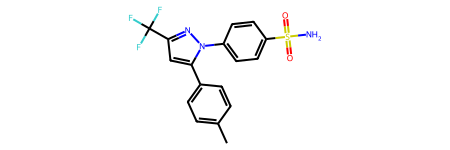

In [85]:
print(smi)
mol = Chem.MolFromSmiles(smi)
#print(dockstring_target.dock(smi))
display(mol)

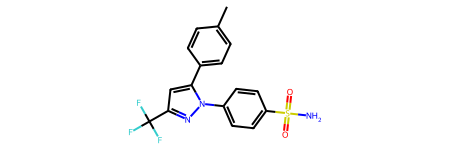

In [87]:
randomized_smi = randomize_smiles(mol)
randomized_mol = Chem.MolFromSmiles(randomized_smi)
#print(dockstring_target.dock(randomized_smi))
display(randomized_mol)

In [88]:
mol_graph = gs.MolecularGraph(mol)
random_mol_graph = gs.MolecularGraph(randomized_mol)

In [89]:
nx.is_isomorphic(mol_graph.diG, random_mol_graph.diG)

False

In [81]:
def format(n, d):
    if d['atom'].group_tag is None:
        return f'{d["atom"].element}'
    else:
        group_idx, inner_idx = d['atom'].group_tag
        group_name = molG.groups[group_idx].name

        inner_element = d['atom'].element
        return f'{group_name}_{inner_element}'

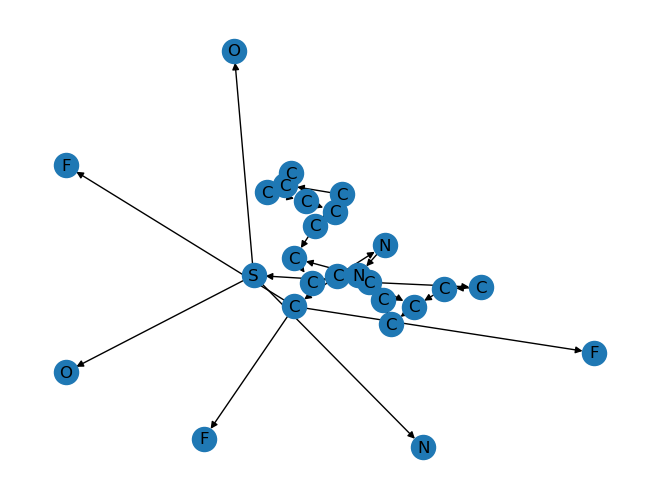

In [82]:
labels = {n: format(n, d) for n, d in mol_graph.diG.nodes(data=True)}
nx.draw(mol_graph.diG, labels=labels, with_labels=True)

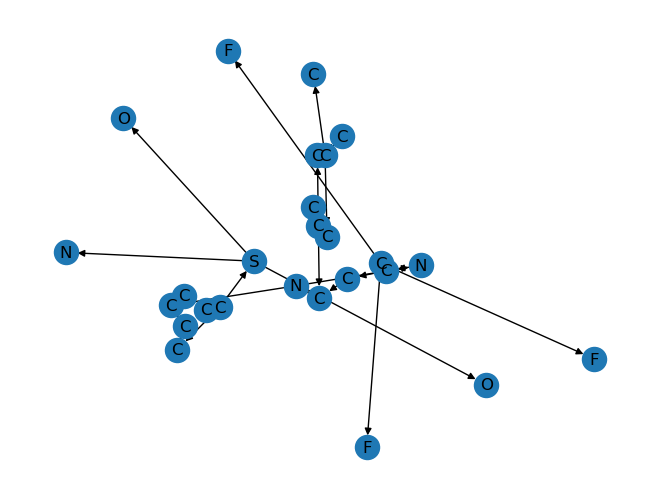

In [90]:
labels = {n: format(n, d) for n, d in random_mol_graph.diG.nodes(data=True)}
nx.draw(random_mol_graph.diG, labels=labels, with_labels=True)